# Problem Statement
# Introduction

Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.


# Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

Figure 1. Loan Data Set
Figure 1. Loan Data Set

When a person applies for a loan, there are two types of decisions that could be taken by the company:

- Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

    Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

- Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
 



# Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

In [613]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [614]:
data = pd.read_csv("loan.csv",error_bad_lines=False, index_col=False, dtype='unicode')

C:\Users\DELL\AppData\Local\Temp\ipykernel_7728\1396019987.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("loan.csv",error_bad_lines=False, index_col=False, dtype='unicode')


In [615]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [616]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [617]:
data.shape

(39717, 111)

# Data Cleaning

- Fix rows & columns
- Fix missing values
- Standarise values
- Filter & fix invalid values

In [618]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,'percent_missing': percent_missing.round(2)})
missing_value_df.sort_values('percent_missing', inplace=True)

In [619]:
missing_value_df.head()

,column_name,percent_missing
id,id,0.0
earliest_cr_line,earliest_cr_line,0.0
inq_last_6mths,inq_last_6mths,0.0
open_acc,open_acc,0.0
pub_rec,pub_rec,0.0


In [620]:
missing_value_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, id to total_il_high_credit_limit
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   column_name      111 non-null    object 
 1   percent_missing  111 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [621]:
# columns having null value
(missing_value_df['percent_missing'] == 100.00).sum()

54

In [622]:
missing_value_col= missing_value_df[(missing_value_df['percent_missing'] == 100.00)]

In [623]:
missing_value_col.column_name

num_bc_sats                                          num_bc_sats
mths_since_recent_bc                        mths_since_recent_bc
mths_since_recent_bc_dlq                mths_since_recent_bc_dlq
mths_since_recent_inq                      mths_since_recent_inq
mths_since_recent_revol_delinq    mths_since_recent_revol_delinq
num_accts_ever_120_pd                      num_accts_ever_120_pd
num_actv_bc_tl                                    num_actv_bc_tl
num_actv_rev_tl                                  num_actv_rev_tl
mort_acc                                                mort_acc
num_bc_tl                                              num_bc_tl
num_tl_op_past_12m                            num_tl_op_past_12m
num_op_rev_tl                                      num_op_rev_tl
num_rev_accts                                      num_rev_accts
num_rev_tl_bal_gt_0                          num_rev_tl_bal_gt_0
num_sats                                                num_sats
num_tl_120dpd_2m         

In [624]:
clean_data = data.drop(missing_value_col.column_name, axis=1)

In [625]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          39717 non-null  object
 1   member_id                   39717 non-null  object
 2   loan_amnt                   39717 non-null  object
 3   funded_amnt                 39717 non-null  object
 4   funded_amnt_inv             39717 non-null  object
 5   term                        39717 non-null  object
 6   int_rate                    39717 non-null  object
 7   installment                 39717 non-null  object
 8   grade                       39717 non-null  object
 9   sub_grade                   39717 non-null  object
 10  emp_title                   37258 non-null  object
 11  emp_length                  38642 non-null  object
 12  home_ownership              39717 non-null  object
 13  annual_inc                  39717 non-null  ob

In [626]:
## Deleting column not adding any importance in analysis
clean_data=clean_data.drop(['delinq_amnt','desc', 'member_id', 'id', 'url'], axis=1)

In [627]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   loan_amnt                   39717 non-null  object
 1   funded_amnt                 39717 non-null  object
 2   funded_amnt_inv             39717 non-null  object
 3   term                        39717 non-null  object
 4   int_rate                    39717 non-null  object
 5   installment                 39717 non-null  object
 6   grade                       39717 non-null  object
 7   sub_grade                   39717 non-null  object
 8   emp_title                   37258 non-null  object
 9   emp_length                  38642 non-null  object
 10  home_ownership              39717 non-null  object
 11  annual_inc                  39717 non-null  object
 12  verification_status         39717 non-null  object
 13  issue_d                     39717 non-null  ob

In [628]:
## Deleting column not adding any importance in analysis
clean_data=clean_data.drop(['next_pymnt_d','mths_since_last_record', 'mths_since_last_delinq'], axis=1)

In [629]:
((clean_data.isnull().sum() * 100 / len(clean_data)).sort_values(
    ascending=False)).head(11)


emp_title                     6.191303
emp_length                    2.706650
pub_rec_bankruptcies          1.754916
last_pymnt_d                  0.178765
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
revol_util                    0.125891
tax_liens                     0.098195
title                         0.027696
last_credit_pull_d            0.005036
total_rec_prncp               0.000000
dtype: float64

In [630]:
clean_data.shape

(39717, 49)

## Creating derived columns

In [631]:
clean_data['term_months']=clean_data['term'].str.rstrip('months')
clean_data=clean_data.drop(['term'], axis=1)

In [632]:
clean_data['emp_length_years']=clean_data['emp_length'].str.rstrip('years ')

clean_data['emp_length_years'][clean_data['emp_length_years']=='< 1']='0.5'
clean_data['emp_length_years']=clean_data['emp_length_years'].str.rstrip('+')

In [633]:
clean_data['int_rate_percentage']=clean_data['int_rate'].str.rstrip('%')

In [634]:
clean_data=clean_data.drop(['emp_length','int_rate'], axis=1)

In [635]:
clean_data['revol_util_percentage']=clean_data['revol_util'].str.rstrip('%')
clean_data=clean_data.drop(['revol_util'], axis=1)

In [636]:
clean_data['issue_d_month'], clean_data['issue_d_year'] = clean_data[
    'issue_d'].str.split('-').str

clean_data['last_credit_pull_d_month'], clean_data['last_credit_pull_d_year'] = clean_data[
    'last_credit_pull_d'].str.split('-').str

clean_data['last_pymnt_d_month'], clean_data['last_pymnt_d_year'] = clean_data[
    'last_pymnt_d'].str.split('-').str

clean_data['earliest_cr_line_month'], clean_data['earliest_cr_line_year'] = clean_data[
    'earliest_cr_line'].str.split('-').str

C:\Users\DELL\AppData\Local\Temp\ipykernel_7728\582961713.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  clean_data['issue_d_month'], clean_data['issue_d_year'] = clean_data[
C:\Users\DELL\AppData\Local\Temp\ipykernel_7728\582961713.py:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  clean_data['last_credit_pull_d_month'], clean_data['last_credit_pull_d_year'] = clean_data[
C:\Users\DELL\AppData\Local\Temp\ipykernel_7728\582961713.py:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  clean_data['last_pymnt_d_month'], clean_data['last_pymnt_d_year'] = clean_data[
C:\Users\DELL\AppData\Local\Temp\ipykernel_7728\582961713.py:10: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  clean_data['earliest_cr_line_month'], clean_data['earliest_cr_line_year'] = clean_data[


In [637]:
clean_data['issue_d_year'] = '20' + clean_data['issue_d_year']

# Updated column datatype

In [638]:
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv']
clean_data[columns] = clean_data[columns].astype(np.float64)

In [639]:
 columns = ['emp_length_years', 'dti', 
          'revol_bal']
clean_data[columns] = clean_data[columns].astype(np.float64)

In [640]:
 columns = [ 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee']
clean_data[columns] = clean_data[columns].astype(np.float64)

In [641]:
 columns = ['recoveries', 'collection_recovery_fee', 'int_rate_percentage', 'emp_length_years',
          'revol_util_percentage','annual_inc']
clean_data[columns] = clean_data[columns].astype(np.float64)

In [642]:
# Creating a profit and loss column
clean_data['PnL']=(clean_data['total_pymnt']-clean_data['funded_amnt'])*100/clean_data['funded_amnt']

In [643]:
clean_data['loan_inc_ratio'] = clean_data.funded_amnt*100/clean_data.annual_inc

In [644]:
clean_data.annual_inc.dtype

dtype('float64')

In [645]:
columns = ['total_acc', 'term_months', 'issue_d_year']
clean_data[columns] = clean_data[columns].astype(np.int64)

In [646]:
columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
clean_data[columns] = clean_data[columns].apply(lambda x: x.astype('category'))


In [647]:
clean_data['annual_inc_lakhs'] = clean_data['annual_inc'] / 1000

In [648]:
clean_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,...,issue_d_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,PnL,loan_inc_ratio,annual_inc_lakhs
0,5000.0,5000.0,4975.0,162.87,B,B2,NaN,RENT,24000.0,Verified,...,2011,May,16,Jan,15,Jan,85,17.263104,20.833333,24.000
1,2500.0,2500.0,2500.0,59.83,C,C4,Ryder,RENT,30000.0,Source Verified,...,2011,Sep,13,Apr,13,Apr,99,-59.651600,8.333333,30.000
2,2400.0,2400.0,2400.0,84.33,C,C5,NaN,RENT,12252.0,Not Verified,...,2011,May,16,Jun,14,Nov,01,25.236118,19.588639,12.252
3,10000.0,10000.0,10000.0,339.31,C,C1,AIR RESOURCES BOARD,RENT,49200.0,Source Verified,...,2011,Apr,16,Jan,15,Feb,96,22.318900,20.325203,49.200
4,3000.0,3000.0,3000.0,67.79,B,B5,University Medical Group,RENT,80000.0,Source Verified,...,2011,May,16,May,16,Jan,96,17.111000,3.750000,80.000


# Count of Categorical and Numeric columns

In [649]:
numeric_data = clean_data.select_dtypes(include = [np.number])

categorical_data = clean_data.select_dtypes(exclude = [np.number, object])

string_data = clean_data.select_dtypes(include = [object])

print('There are {0} numerical , {1} categorical and {2} string features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1], string_data.shape[1]))

There are 24 numerical , 12 categorical and 24 string features in the training data


In [650]:
## Removing current loan status as it's not needed in the analysis
clean_data = clean_data[clean_data.loan_status !='Current']
clean_data = clean_data.loc[:,clean_data.nunique()!=1]
## Final dataset for Exploratory Data Analytics

In [651]:
df=clean_data

In [652]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current            0
Name: loan_status, dtype: int64

# Univariate Analysis

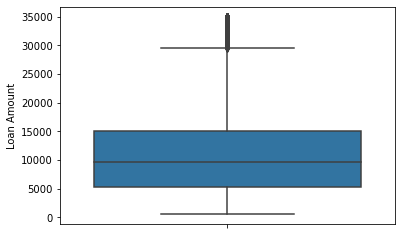

In [653]:
sns.boxplot( y=df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

Inference: The loan amount varies from 0 to 35,000 having mean of 10,000

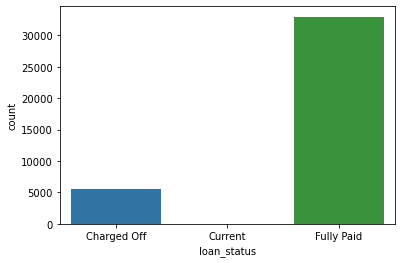

In [654]:
sns.countplot(x= df["loan_status"])
plt.show()

In [655]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current            0
Name: loan_status, dtype: int64

Inference:

Most of the loans are Fully Paid.
About 14% of loan are having status as defaulters.


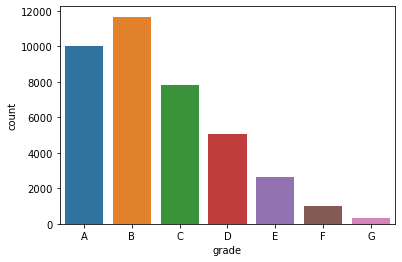

In [656]:
sns.countplot(x='grade', data=df)
plt.show()

Inference: Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans

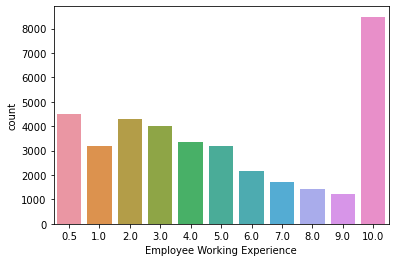

In [657]:
sns.countplot(x='emp_length_years', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

Inference: Majority of employees applying for the loan have more than 10 years of experience

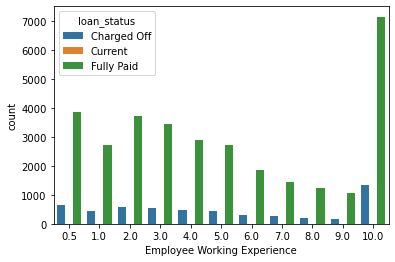

In [658]:
sns.countplot(x='emp_length_years', hue='loan_status', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

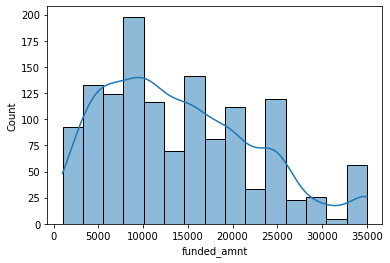

In [659]:
sns.histplot(x='funded_amnt', data=df[(df['emp_length_years']==10) & (df['loan_status']=='Charged Off')],kde=True)
plt.show()

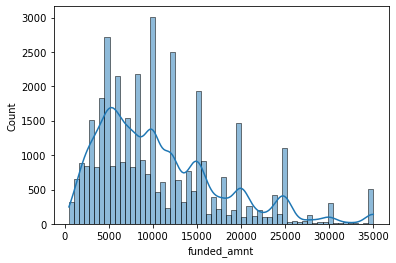

In [660]:
sns.histplot(df['funded_amnt'], kde=True)
plt.show()

Inference: Funded amount is left skewed. Most of the loan amount given is 5 lakhs

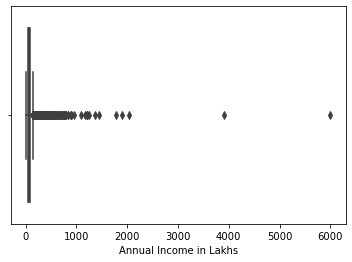

In [661]:
sns.boxplot(x=df['annual_inc_lakhs'])
plt.xlabel('Annual Income in Lakhs')
plt.show()

Inference: There are only two applicants having annual income of more than 30 lakhs

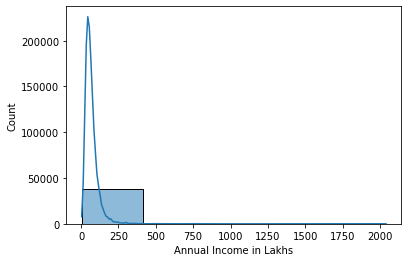

In [662]:
sns.histplot(df[df['annual_inc_lakhs'] < 3000]['annual_inc_lakhs'], bins=5, kde=True)
plt.xlabel('Annual Income in Lakhs')
plt.show()

Inference: Majority of loan applicants have income less than 5 lakhs

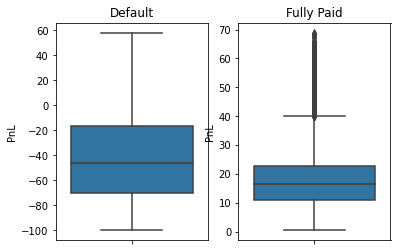

In [663]:
#Relationship of Funded Amount with defaults
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=df[df.loan_status=='Charged Off'].PnL)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=df[df.loan_status=='Fully Paid'].PnL)
plt.show()

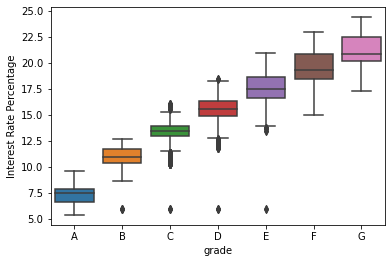

In [664]:
sns.boxplot(y='int_rate_percentage', x='grade', data=df)
plt.ylabel('Interest Rate Percentage')
plt.show()

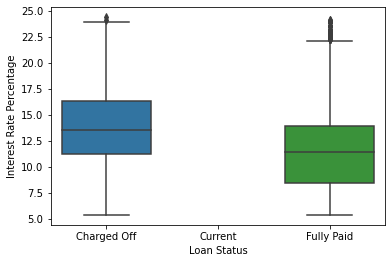

In [665]:
sns.boxplot(y='int_rate_percentage', x='loan_status', data=df)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

High interest rate have higher tendency to default the loan

# Segmented Univariate Analysis


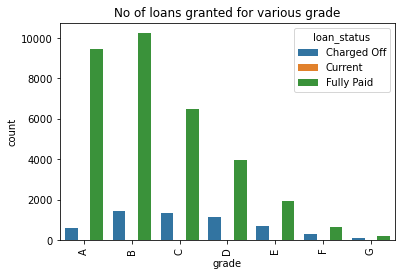

In [666]:
sns.countplot(x='grade', hue='loan_status', data=df)
plt.title('No of loans granted for various grade')
plt.xticks(rotation=90)
plt.show()



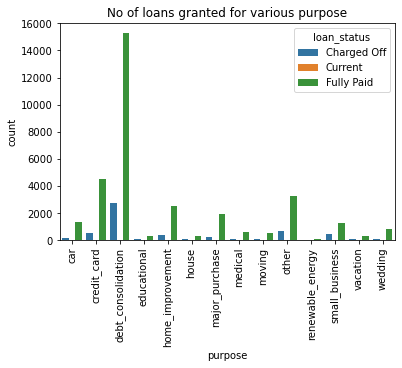

In [667]:
sns.countplot(x='purpose', hue='loan_status', data=df)
plt.title('No of loans granted for various purpose')
plt.xticks(rotation=90)
plt.show()

Inference: Majority of loan has been given for the debt consolidation purpose and has been fully paid.

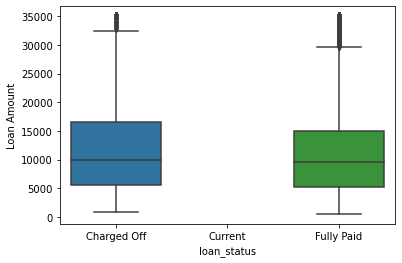

In [668]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=df)
plt.ylabel('Loan Amount')
plt.show()

Inference: Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

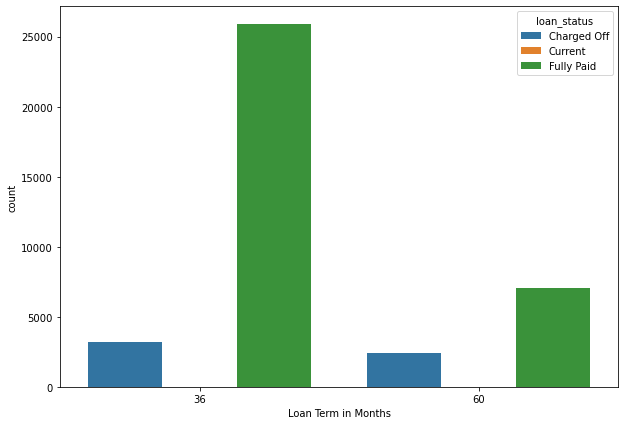

In [669]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='loan_status', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

Inference Tenure of 60 months have high chance to be defaulter

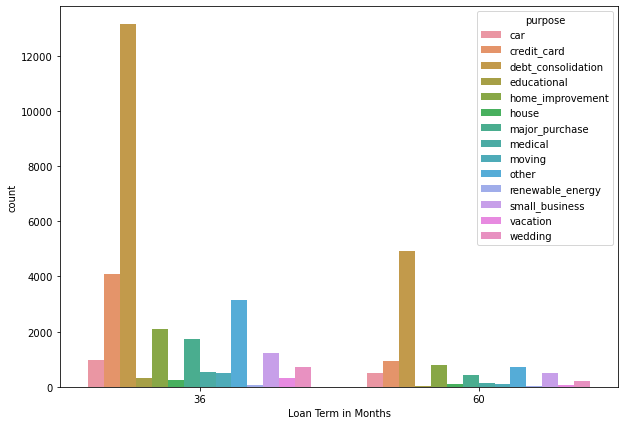

In [670]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='purpose', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

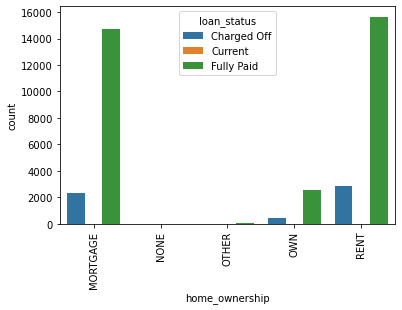

In [671]:
sns.countplot(x='home_ownership', hue='loan_status', data=df)

plt.xticks(rotation=90)
plt.show()

Applicant having home rented or Mortgage have high tendency to default the loan

# Bivariate Plots

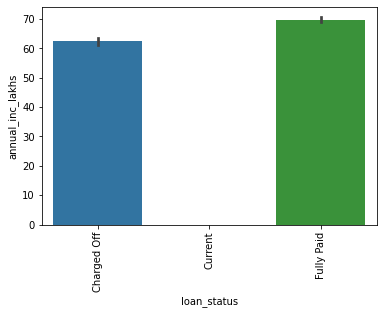

In [672]:
sns.barplot(y='annual_inc_lakhs', x='loan_status', data=df)
plt.xticks(rotation=90)
plt.show()

Inference Employee with loan annual income have marjinal change to be defaulter

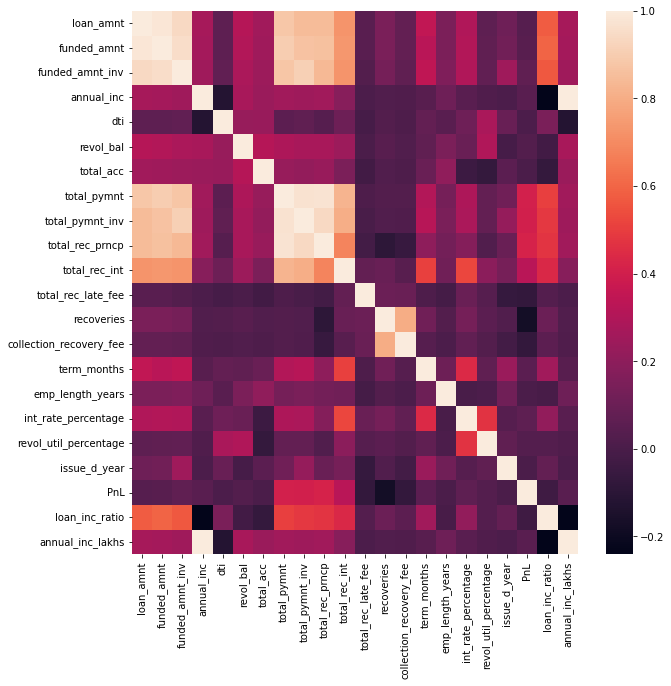

In [673]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

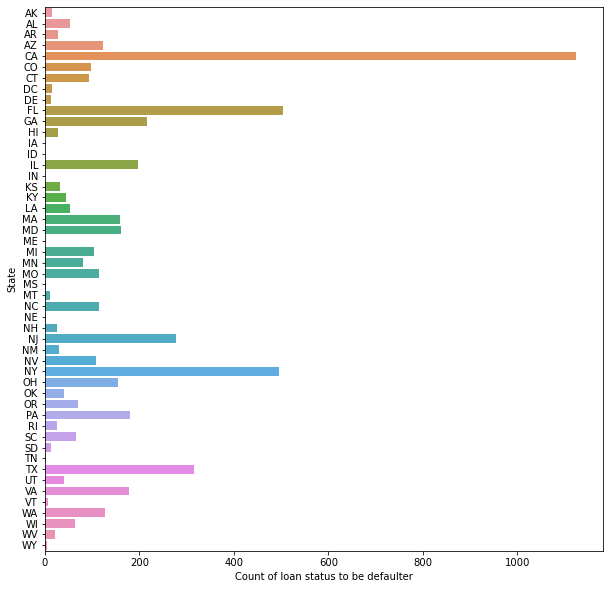

In [674]:
g = df[df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

Inference: Applicants from the state CA are having high probability to be default

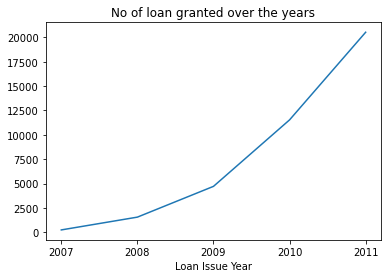

In [675]:
g = df.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

Inference: Loan Applicants have been increasing exponentially from year 2007 to 2011

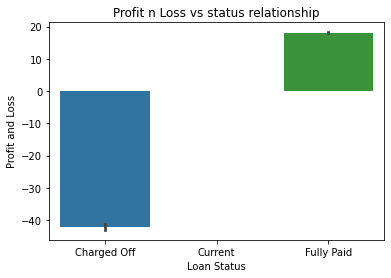

In [676]:
# Relationship of default with funded amount with a barplot
sns.barplot(x='loan_status',y='PnL',data=df)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")

plt.title("Profit n Loss vs status relationship")

plt.show()

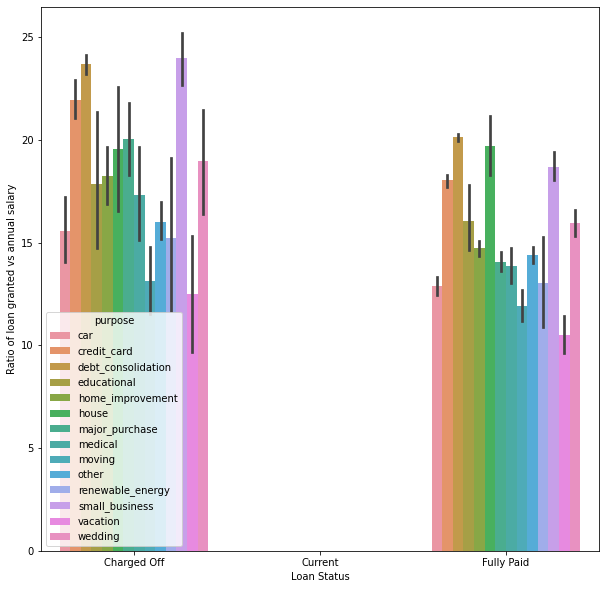

In [677]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=df)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

Inference : People having high income tends to default loan

In [678]:
df_agg = df[df['funded_amnt'] <= 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

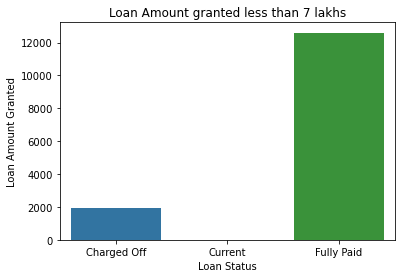

In [679]:
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted less than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

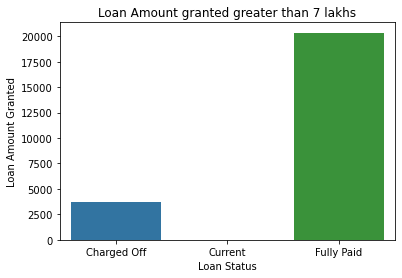

In [680]:
df_agg1 = df[df['funded_amnt'] > 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

sns.barplot(x='loan_status', y='funded_amnt', data=df_agg1)
plt.title('Loan Amount granted greater than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()